##### **1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

**Answer**:

Using classical approach:
- For calculating the $c_{i,j} = \sum_{k=1}^{n} a_{i,k} \cdot b_{k,j}$, this computation needs order of N<sup>3</sup>.
- The number of multiplications in this method would be NxKxM.
- For example we are multiplying 2 matrices having dimension 2X2, we would be multiplying 8 times(2X2X2).
- For the same algorithm the number of additions would be NxMx(K-1). Considering the same example we would be doing addition operation 4 times   (2X2X1).

Using Strassen's algorithm:
- Volker Strassen, German mathematician proposed a new algorithm in which the bigger matrices are broken down into smaller ones and then multiplied.
- This approach reduced the number of operations needed to multiply the matrices.
- If matrices are a sqaure matricies of NxN, scalar multiplications are n<sup>log<sub>2</sub>7</sup>
- In case of generalised matrix, A<sub>NXK</sub>⋅ B<sub>KXM</sub>, we get S=next_power_of_two(max(n,k,m))[Padding A and B both with zeros to make it sqaure matrix].
- Additions for this algorithm is nearly 6(n<sup>log<sub>2</sub>7</sup> - n<sup>2</sup>).

##### **2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [2]:
!pip install numpy

   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/13.1 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/13.1 MB 7.3 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/13.1 MB 7.1 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/13.1 MB 7.0 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.1 MB 7.1 MB/s eta 0:00:01
   ---------------------------- ----------- 9.2/13.1 MB 7.2 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.1 MB 7.2 MB/s eta 0:00:01
   ------------------------------------- -- 12.3/13.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 13.1/13.1 MB 7.0 MB/s  0:00:01


In [3]:
import time
import numpy as np
import random

def generate_random_matrices(n, k, m, lower=0, upper=10):
    
    A_list = [[random.randint(lower, upper) for _ in range(k)] for _ in range(n)]
    B_list = [[random.randint(lower, upper) for _ in range(m)] for _ in range(k)]
    A_np = np.array(A_list) #making generated array in numpy array
    B_np = np.array(B_list)
    return A_list, B_list, A_np, B_np

def list_of__list(A, B):
    n, k, m = len(A), len(A[0]), len(B[0])
    C = [[0] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for t in range(k):
                C[i][j] += A[i][t] * B[t][j]
    return C

def multiply_with_numpy(A, B):
    return np.dot(A, B)

n = random.randint(50, 150)
k = random.randint(50, 150)
m = random.randint(50, 150)

A_list, B_list, A_np, B_np = generate_random_matrices(n, k, m)

#Timing of list method
start = time.time()
_ = list_of__list(A_list, B_list)
t_list = time.time() - start

# Timing of numpy
start = time.time()
_ = multiply_with_numpy(A_np, B_np)
t_numpy = time.time() - start

# Output results
print(f"Matrices dimensions: A({n}×{k}), B({k}×{m})")
print(f"List-of-lists time: {t_list:.6f} seconds")
print(f"NumPy time:         {t_numpy:.6f} seconds")


Matrices dimensions: A(61×99), B(99×75)
List-of-lists time: 0.088779 seconds
NumPy time:         0.002004 seconds


Here Numpy multiplication clearly wins, because the Numpy is using directly using C backend which develivers a greater speed compared to python lists. Using lists of list method might come close to numpy for smaller matricies but for larger dimensions , numpy have a clear edge. 

However using just lists of list we can make it better if we use Strassen algorithm and the timings can be compared as below.

In [20]:
import time
import random

def generate_random_square_matrix(n, lower=0, upper=10):
    A_list = [[random.randint(lower, upper) for _ in range(n)] for _ in range(n)]
    B_list = [[random.randint(lower, upper) for _ in range(n)] for _ in range(n)]
    return A_list, B_list

def list_of__list(A, B, n):
    C = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

def add_matrix(A, B, n):
    return [[A[i][j] + B[i][j] for j in range(n)] for i in range(n)]

def sub_matrix(A, B, n):
    return [[A[i][j] - B[i][j] for j in range(n)] for i in range(n)]


def strassen(A, B):
    n = len(A)
    return strassen_recursive(A, B, n)

def strassen_recursive(A, B, n):
    # Base case for recursion: switch to standard multiplication
    if n <= 64:
        return list_of__list(A, B, n)

    mid = n // 2
    

    A11 = [row[:mid] for row in A[:mid]]
    A12 = [row[mid:] for row in A[:mid]]
    A21 = [row[:mid] for row in A[mid:]]
    A22 = [row[mid:] for row in A[mid:]]
    
    B11 = [row[:mid] for row in B[:mid]]
    B12 = [row[mid:] for row in B[:mid]]
    B21 = [row[:mid] for row in B[mid:]]
    B22 = [row[mid:] for row in B[mid:]]

    M1 = strassen_recursive(add_matrix(A11, A22, mid), add_matrix(B11, B22, mid), mid)
    M2 = strassen_recursive(add_matrix(A21, A22, mid), B11, mid)
    M3 = strassen_recursive(A11, sub_matrix(B12, B22, mid), mid)
    M4 = strassen_recursive(A22, sub_matrix(B21, B11, mid), mid)
    M5 = strassen_recursive(add_matrix(A11, A12, mid), B22, mid)
    M6 = strassen_recursive(sub_matrix(A21, A11, mid), add_matrix(B11, B12, mid), mid)
    M7 = strassen_recursive(sub_matrix(A12, A22, mid), add_matrix(B21, B22, mid), mid)
    

    C11 = add_matrix(sub_matrix(add_matrix(M1, M4, mid), M5, mid), M7, mid)
    C12 = add_matrix(M3, M5, mid)
    C21 = add_matrix(M2, M4, mid)
    C22 = add_matrix(sub_matrix(add_matrix(M1, M3, mid), M2, mid), M6, mid)

    C = [[0] * n for _ in range(n)]
    for i in range(mid):
        for j in range(mid):
            C[i][j] = C11[i][j]
            C[i][j + mid] = C12[i][j]
            C[i + mid][j] = C21[i][j]
            C[i + mid][j + mid] = C22[i][j]
            
    return C

def next_power_of_two(x):
    return 1 if x == 0 else 2**(x - 1).bit_length()

def pad_matrix(A, size):
    old_size = len(A)
    padded = [[0]*size for _ in range(size)]
    for i in range(old_size):
        for j in range(old_size):
            padded[i][j] = A[i][j]
    return padded


n = 512
A_list, B_list = generate_random_square_matrix(n)

size_pow2 = next_power_of_two(n)
A_pad = pad_matrix(A_list, size_pow2)
B_pad = pad_matrix(B_list, size_pow2)

# Timing standard multiplication
start_list = time.time()
_ = list_of__list(A_list, B_list, n)
t_list = time.time() - start_list

# Timing Strassen
start_strassen = time.time()
C_strassen_padded = strassen(A_pad, B_pad)
t_strassen = time.time() - start_strassen

# Print results
print(f"Matrix size: {n}x{n}")
print(f"List of lists method time: {t_list:.6f} seconds")
print(f"Strassen time:              {t_strassen:.6f} seconds")

Matrix size: 512x512
List of lists method time: 29.450087 seconds
Strassen time:              21.125862 seconds


##### **3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Answer:

- Considering in the worst case the largest element is in the last position thus we require to traverse the whole list which need O(n) time. Similarly for second largest element it is in the second last place, thus we again need to almost traverse the whole list[n-1 elements]. 
- Similarly we continue this algorithm and we need to find the k<sup>th</sup> largest element, in our case k = n/2 or (n+1/2), each pass does O(n) time, therefore the median would be obtained in O(n<sup>2</sup>) time.

- Better approach is to sort the whole list and just pick the middle element from that. Now for sorting we can use quicksort because we just need to find the median hence sorting all the data is not required. 

In [ ]:
import time
import random
import numpy as np

######### Naive algo ###################

def median_naive(lst):
    lst_copy = lst[:]  # making a copy of original and working on that
    n = len(lst_copy)
    target_index = n // 2
    for _ in range(target_index):
        max_val = max(lst_copy)
        lst_copy.remove(max_val)
    return max(lst_copy) if n % 2 == 1 else sum(sorted(lst_copy)[-2:]) / 2

############ Quick select ##################

def quickselect(lst, k):
  
    if len(lst) == 1:
        return lst[0]
    pivot = random.choice(lst)
    lows  = [el for el in lst if el < pivot]
    highs = [el for el in lst if el > pivot]
    pivots = [el for el in lst if el == pivot]
    
    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivot
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def median_quickselect(lst):
    n = len(lst)
    if n % 2 == 1:
        return quickselect(lst, n // 2)
    else:
        return 0.5 * (quickselect(lst, n // 2 - 1) + quickselect(lst, n // 2))

####### Compare #################
sizes = [10_000, 50_000]  # adjust sizes
for size in sizes:
    data = [random.randint(0, 10**6) for _ in range(size)]
    data_np = np.array(data)
    
    print(f"\n--- Size: {size} ---")
    

    start = time.time()
    median_naive(data)
    end = time.time()
    print(f"Naive O(n^2) time: {end - start:.4f} sec")
    
    
    start = time.time()
    median_quickselect(data)
    end = time.time()
    print(f"Quickselect O(n) avg time: {end - start:.4f} sec")
    
    start = time.perf_counter()
    np.median(data_np)
    end = time.perf_counter()
    print(f"NumPy median time: {end - start:.4f} sec")



--- Size: 10000 ---
Naive O(n^2) time: 0.5970 sec
Quickselect O(n) avg time: 0.0008 sec
NumPy median time: 0.0002 sec

--- Size: 50000 ---
Naive O(n^2) time: 15.2519 sec
Quickselect O(n) avg time: 0.0526 sec
NumPy median time: 0.0005 sec


There are multiple reasons for Numpy being so fast in calculating median:
- First it's highly optimised and under the hood it's working in C.
- Second it uses partion algorithm to that runs in average O(n) time, and it doesn't necessarily sort the whole array.It rearranges the array such that the median element is in its final sorted position, without fully sorting all elements.

#### **4.What is the gradient of the following function with respect to x and y?**

Answer:

Gradient with respect to x = (2x)y + y<sup>3</sup>cos(x)

Gradient with respect to y = x<sup>2</sup> + 3y<sup>2</sup>sin(x)

So final, 

$\nabla f(x, y) = \left( 2xy + y^3 \cos(x),\; x^2 + 3y^2 \sin(x) \right)$
#### 4.What is the gradient of the following function with respect to x and y?

Answer:

Gradient with respect to x = (2x)y + y<sup>3</sup>cos(x)

Gradient with respect to y = x<sup>2</sup> + 3y<sup>2</sup>sin(x)

So final, 

$\nabla f(x, y) = \left( 2xy + y^3 \cos(x),\; x^2 + 3y^2 \sin(x) \right)$


In [1]:
!pip install --upgrade jax

  Using cached jax-0.7.0-py3-none-any.whl (2.8 MB)
  Attempting uninstall: jax
    Found existing installation: jax 0.4.21
    Uninstalling jax-0.4.21:
      Successfully uninstalled jax-0.4.21



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np


def f(vars):
    x, y = vars
    return x**2 * y + y**3 * jnp.sin(x)


def grad_analytical(vars):
    x, y = vars
    df_dx = 2*x*y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3*y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])


grad_jax = jax.grad(f)


key = jax.random.PRNGKey(0)
for i in range(5):
    xy = jax.random.uniform(key, shape=(2,), minval=-5, maxval=5)
    key, _ = jax.random.split(key)

    grad_a = grad_analytical(xy)
    grad_j = grad_jax(xy)

    print(f"Test {i+1}")
    print(f"x, y = {xy}")
    print(f"Analytical gradient: {grad_a}")
    print(f"JAX gradient:        {grad_j}")
    print(f"Match? {jnp.allclose(grad_a, grad_j)}\n")


Test 1
x, y = [4.4766703 4.785799 ]
Analytical gradient: [ 17.249584 -46.77094 ]
JAX gradient:        [ 17.249584 -46.77094 ]
Match? True

Test 2
x, y = [ 3.4231412 -3.1762135]
Analytical gradient: [9.035805 3.30896 ]
JAX gradient:        [9.035805 3.30896 ]
Match? True

Test 3
x, y = [-2.1728003  2.8809726]
Analytical gradient: [-26.060854 -15.801586]
JAX gradient:        [-26.060854 -15.801586]
Match? True

Test 4
x, y = [-4.282542  -1.3747907]
Analytical gradient: [12.858043 23.4945  ]
JAX gradient:        [12.858043 23.4945  ]
Match? True

Test 5
x, y = [-4.4137754 -2.8242433]
Analytical gradient: [31.558537 42.35149 ]
JAX gradient:        [31.558537 42.35149 ]
Match? True



In [3]:
!pip install sympy

                                              0.0/6.3 MB ? eta -:--:--
     -                                        0.2/6.3 MB 3.5 MB/s eta 0:00:02
     ---                                      0.6/6.3 MB 6.4 MB/s eta 0:00:01
     ----                                     0.6/6.3 MB 5.0 MB/s eta 0:00:02
     --------                                 1.3/6.3 MB 7.0 MB/s eta 0:00:01
     ---------                                1.5/6.3 MB 6.4 MB/s eta 0:00:01
     ------------                             2.0/6.3 MB 7.4 MB/s eta 0:00:01
     -------------                            2.2/6.3 MB 6.6 MB/s eta 0:00:01
     ---------------                          2.5/6.3 MB 7.3 MB/s eta 0:00:01
     -------------------                      3.0/6.3 MB 7.1 MB/s eta 0:00:01
     ---------------------                    3.3/6.3 MB 7.3 MB/s eta 0:00:01
     -----------------------                  3.7/6.3 MB 7.1 MB/s eta 0:00:01
     -------------------------                4.0/6.3 MB 7.2 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##### **6.Use sympy to confirm that you obtain the same gradient analytically.**

In [4]:
import sympy as sp
import numpy as np


x, y = sp.symbols('x y')


f = x**2 * y + y**3 * sp.sin(x)

# Symbolic gradients
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Symbolic ∂f/∂x:", df_dx)
print("Symbolic ∂f/∂y:", df_dy)

# Convert symbolic derivatives to numeric functions
df_dx_func = sp.lambdify((x, y), df_dx, 'numpy')
df_dy_func = sp.lambdify((x, y), df_dy, 'numpy')

# Analytical gradient (manually derived)
def grad_analytical(x_val, y_val):
    return np.array([2*x_val*y_val + y_val**3 * np.cos(x_val),
                     x_val**2 + 3*y_val**2 * np.sin(x_val)], dtype=float)

# Test on a few random points
rng = np.random.default_rng(0)
points = rng.uniform(-5, 5, size=(5, 2))

for px, py in points:
    grad_sympy = np.array([df_dx_func(px, py), df_dy_func(px, py)], dtype=float)
    grad_manual = grad_analytical(px, py)
    print(f"(x, y) = ({px:.3f}, {py:.3f})")
    print("SymPy grad:", grad_sympy)
    print("Manual grad:", grad_manual)
    print("Match?", np.allclose(grad_sympy, grad_manual), "\n")


Symbolic ∂f/∂x: 2*x*y + y**3*cos(x)
Symbolic ∂f/∂y: x**2 + 3*y**2*sin(x)
(x, y) = (1.370, -2.302)
SymPy grad: [-8.74412251 17.45463072]
Manual grad: [-8.74412251 17.45463072]
Match? True 

(x, y) = (-4.590, -4.835)
SymPy grad: [58.15224014 90.67191482]
Manual grad: [58.15224014 90.67191482]
Match? True 

(x, y) = (3.133, 4.128)
SymPy grad: [-44.45641159  10.26820089]
Manual grad: [-44.45641159  10.26820089]
Match? True 

(x, y) = (1.066, 2.295)
SymPy grad: [10.73648426 14.96969159]
Manual grad: [10.73648426 14.96969159]
Match? True 

(x, y) = (0.436, 4.351)
SymPy grad: [78.4369407  24.18504462]
Manual grad: [78.4369407  24.18504462]
Match? True 



#### **7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [ ]:
students_data = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "Tanmay",
                "Marks": {"Maths": 100, "English": 70, "Science": 85}
            },
            {
                "Roll Number": 2,
                "Name": "Rahul",
                "Marks": {"Maths": 90, "English": 80, "Science": 88}
            }
        ],
        "Branch 2": [
            {
                "Roll Number": 3,
                "Name": "Mukesh",
                "Marks": {"Maths": 78, "English": 85, "Science": 82}
            }
        ]
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}

print(students_data[2022]["Branch 1"][0]["Marks"]["Maths"])


100


##### **8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(Roll: {self.roll_number}, Name: {self.name}, Marks: {self.marks})" #used t0 describe class as string


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name: {self.branch_name}, Students: {len(self.students)})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year({self.year}, Branches: {len(self.branches)})"


class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {len(self.years)})"

db = Database()


year_2022 = Year(2022)

branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "Tanmay", {"Maths": 100, "English": 70, "Science": 85}))
branch1_2022.add_student(Student(2, "Rahul", {"Maths": 90, "English": 80, "Science": 88}))

branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(3, "Mukesh", {"Maths": 78, "English": 85, "Science": 82}))

year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

db.add_year(year_2022)

year_2023 = Year(2023)
year_2023.add_branch(Branch("Branch 1"))
year_2023.add_branch(Branch("Branch 2"))
db.add_year(year_2023)

print(db) #here's where __repr__ function will work
print(db.years[0].branches[0].students[0].marks["Maths"])


Database(Years: 2)
100


In [3]:
!pip install matplotlib

                                              0.0/8.1 MB ? eta -:--:--
                                              0.1/8.1 MB 4.2 MB/s eta 0:00:02
     ---                                      0.7/8.1 MB 6.9 MB/s eta 0:00:02
     ---                                      0.8/8.1 MB 5.6 MB/s eta 0:00:02
     ------                                   1.3/8.1 MB 6.4 MB/s eta 0:00:02
     --------                                 1.6/8.1 MB 7.0 MB/s eta 0:00:01
     --------                                 1.8/8.1 MB 5.9 MB/s eta 0:00:02
     ------------                             2.5/8.1 MB 7.1 MB/s eta 0:00:01
     -------------                            2.8/8.1 MB 7.0 MB/s eta 0:00:01
     ---------------                          3.1/8.1 MB 7.3 MB/s eta 0:00:01
     ----------------                         3.4/8.1 MB 7.1 MB/s eta 0:00:01
     ------------------                       3.8/8.1 MB 7.1 MB/s eta 0:00:01
     --------------------                     4.2/8.1 MB 7.2 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

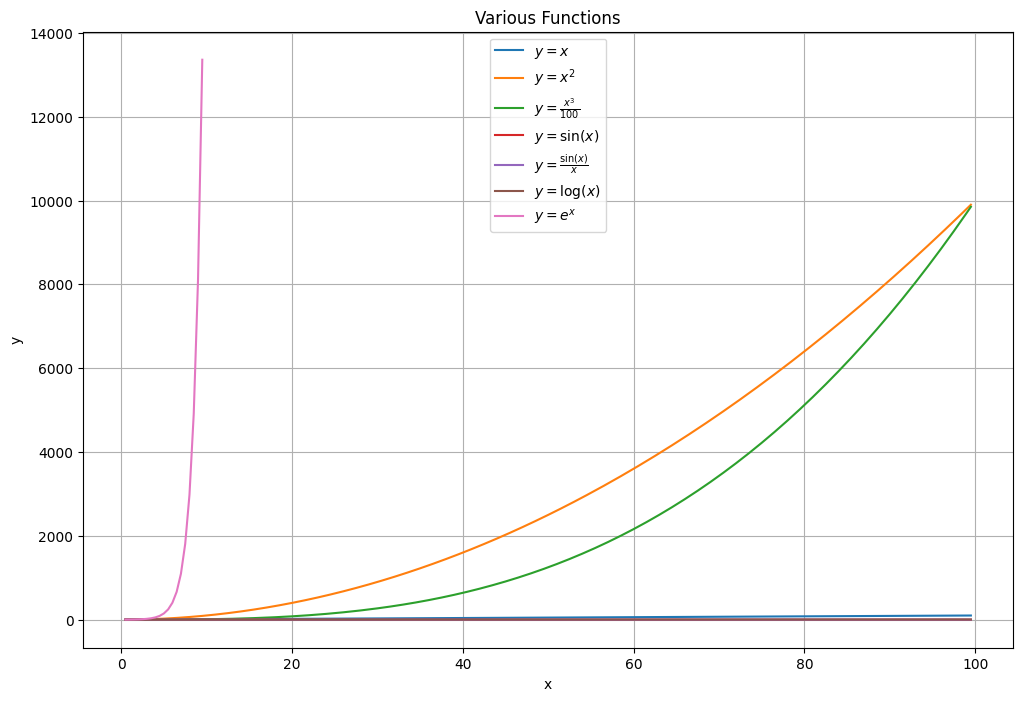

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain
x = np.arange(0.5, 100, 0.5)

# Functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)       
y7 = np.exp(x)


plt.figure(figsize=(12, 8))
plt.plot(x, y1, label=r"$y = x$")
plt.plot(x, y2, label=r"$y = x^2$")
plt.plot(x, y3, label=r"$y = \frac{x^3}{100}$")
plt.plot(x, y4, label=r"$y = \sin(x)$")
plt.plot(x, y5, label=r"$y = \frac{\sin(x)}{x}$")
plt.plot(x, y6, label=r"$y = \log(x)$")

# If not masked all other graphs would look too small to compare
mask = x < 10
plt.plot(x[mask], y7[mask], label=r"$y = e^x$")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Various Functions")
plt.legend()
plt.grid(True)
plt.show()


##### **10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [12]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))


df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])


col_with_max_std = df.std().idxmax()

row_with_min_mean = df.mean(axis=1).idxmin() #axis=1 tells to make row operations

print("DataFrame:\n", df)
print("\nColumn with highest standard deviation:", col_with_max_std)
print("Row index with lowest mean:", row_with_min_mean)


DataFrame:
            a         b         c         d         e
0   1.986437  1.268300  1.804537  1.291443  1.180610
1   1.647306  1.252167  1.131427  1.081399  1.276570
2   1.635517  1.303550  1.053448  1.502831  1.161849
3   1.178520  1.348024  1.621948  1.308827  1.098573
4   1.719091  1.204584  1.418514  1.369788  1.171664
5   1.338537  1.734618  1.632843  1.269181  1.481305
6   1.954073  1.008079  1.267979  1.546345  1.035392
7   1.998730  1.502663  1.433242  1.357461  1.176700
8   1.054275  1.863147  1.580338  1.697649  1.834334
9   1.383201  1.426887  1.038569  1.323910  1.353442
10  1.172859  1.554089  1.874045  1.998690  1.041585
11  1.413716  1.951966  1.744393  1.730483  1.011790
12  1.061871  1.510948  1.293594  1.949450  1.249182
13  1.647548  1.434906  1.692093  1.552155  1.276951
14  1.229061  1.234407  1.650282  1.686205  1.490169
15  1.557753  1.194196  1.008392  1.812863  1.393459
16  1.669084  1.165397  1.252758  1.270658  1.798745
17  1.105588  1.207170  1.507786  

##### **11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))


df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

col_with_max_std = df.std().idxmax()
row_with_min_mean = df.mean(axis=1).idxmin()


df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

lt8_count = (df["g"] == "LT8").sum()


std_lt8 = df.loc[df["g"] == "LT8", "f"].std()
std_gt8 = df.loc[df["g"] == "GT8", "f"].std()


print("DataFrame:\n", df)
print("\nColumn with highest standard deviation:", col_with_max_std)
print("Row index with lowest mean:", row_with_min_mean)
print("\nNumber of rows where g == 'LT8':", lt8_count)
print("Standard deviation of f (LT8):", std_lt8)
print("Standard deviation of f (GT8):", std_gt8)


DataFrame:
            a         b         c         d         e         f    g
0   1.333175  1.892539  1.269618  1.308849  1.413004  7.217186  LT8
1   1.833299  1.729232  1.954095  1.139091  1.131178  7.786895  LT8
2   1.736671  1.881875  1.917117  1.968596  1.428224  8.932483  GT8
3   1.672217  1.534920  1.347897  1.492131  1.719142  7.766307  LT8
4   1.625147  1.004411  1.635835  1.824685  1.092898  7.182977  LT8
5   1.044079  1.520543  1.606419  1.862028  1.486206  7.519275  LT8
6   1.815919  1.482181  1.330861  1.281924  1.689743  7.600629  LT8
7   1.990164  1.336251  1.927894  1.737960  1.160383  8.152651  GT8
8   1.013360  1.664065  1.009643  1.143127  1.351059  6.181254  LT8
9   1.757181  1.716263  1.547972  1.792631  1.262181  8.076228  GT8
10  1.563609  1.971973  1.525604  1.310126  1.045088  7.416400  LT8
11  1.936860  1.361662  1.942694  1.642462  1.223047  8.106724  GT8
12  1.394877  1.090033  1.112472  1.404584  1.452799  6.454765  LT8
13  1.408974  1.821641  1.600189  1.

#### **12. Write a small piece of code to explain broadcasting in numpy.**

**Answer**:
Broadcasting in NumPy is a set of rules that lets arrays of different shapes work together in arithmetic operations without explicitly copying or reshaping data.
If the dimensions of the arrays don’t match, NumPy automatically “stretches” the smaller array along the missing or singleton dimensions so the shapes become compatible.



In [14]:
import numpy as np


A = np.array([[1],
              [2],
              [3]])


B = np.array([10, 20, 30, 40])

C = A * B

print("A shape:", A.shape)
print("B shape:", B.shape)
print("Result C:\n", C)


A shape: (3, 1)
B shape: (4,)
Result C:
 [[ 10  20  30  40]
 [ 20  40  60  80]
 [ 30  60  90 120]]


#### **13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [15]:
import numpy as np

def manual_argmin(arr):
 
    min_index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
            
    return min_index


arr = np.array([5, 2, 8, -3, 7, -1])


print("My argmin index:", manual_argmin(arr))

print("NumPy argmin index:", np.argmin(arr))


My argmin index: 3
NumPy argmin index: 3
